In [1]:
# M es el tamaño de la ventana
# n es el numero de punto, en este caso el array de 0 a 8000
# Ventana Haming: w(n) = 0.54 -0.46 cos(2 Pi n/ M-1)
import numpy as np

def hamming_window(M):
    n = np.arange(M)
    return 0.54 - 0.46 * np.cos(2 * np.pi * n / (M - 1))

# Ventana Hanning : w(n) = 0.5 - 0.5 * cos(2 pi n/ M-1)
import numpy as np

def blackman_window(M):
    n = np.arange(M)
    window = 0.5 - 0.5 * np.cos(2 * np.pi * n / (M-1))
    return window

# Ventana trienagular: w(n) = 2/M-1 * (M-1/2 -  Valor abosluto (n- (M-1/2)))

def triangular_window(M):
    """
    Retorna una ventana triangular de longitud M.
    """
    w = np.zeros(M)
    for n in range(M):
        w[n] = 1 - abs((n - (M-1)/2) / ((M-1)/2))
    return w


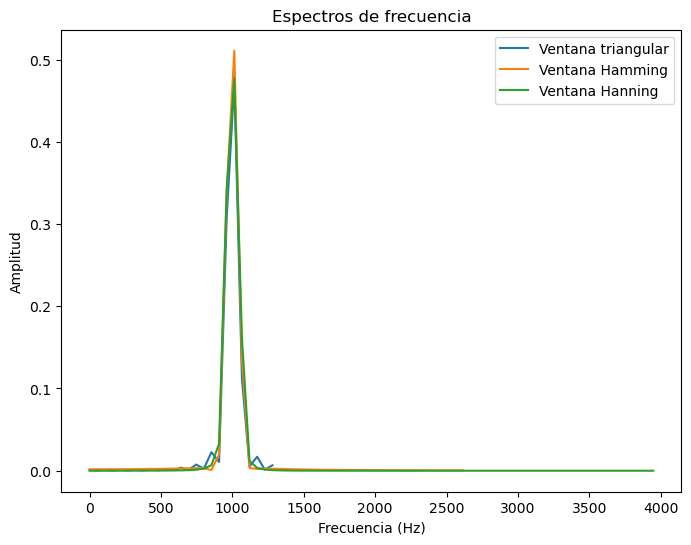

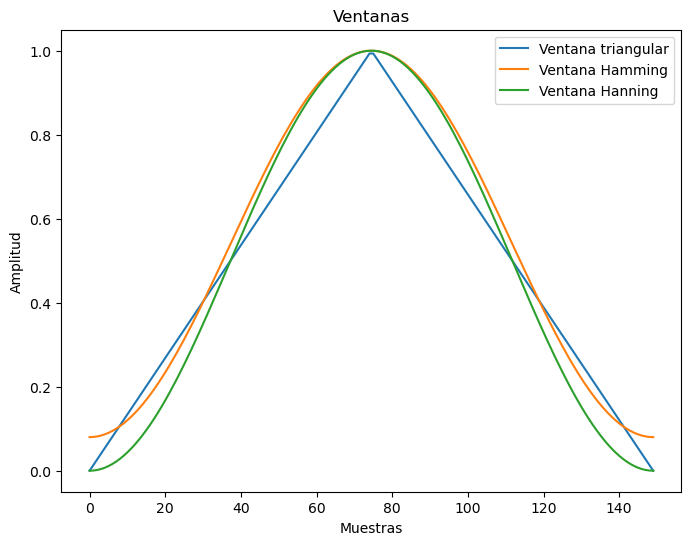

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal de entrada
n = np.arange(0, 8000)
x = 2 * np.sin(2000 * np.pi * n / 8000)

# Definir las ventanas
triangular_window = np.bartlett(150)
hamming_window = np.hamming(150)
hanning_window = np.hanning(150)

# Aplicar las ventanas a la señal de entrada
x_tri = x[:150] * triangular_window
x_ham = x[:150] * hamming_window
x_han = x[:150] * hanning_window

# Calcular la transformada de Fourier
X_tri = np.abs(np.fft.fft(x_tri)) / 150
X_ham = np.abs(np.fft.fft(x_ham)) / 150
X_han = np.abs(np.fft.fft(x_han)) / 150
freq_tri = np.fft.fftfreq(len(x_tri), d=1/8000)
freq_ham = np.fft.fftfreq(len(x_ham), d=1/8000)
freq_han = np.fft.fftfreq(len(x_han), d=1/8000)

# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(freq_tri[:25], X_tri[:25], label='Ventana triangular')
plt.plot(freq_ham[:50], X_ham[:50], label='Ventana Hamming')
plt.plot(freq_han[:75], X_han[:75], label='Ventana Hanning')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectros de frecuencia')
plt.legend()
plt.show()

# Graficar las ventanas
plt.figure(figsize=(8, 6))
plt.plot(triangular_window, label='Ventana triangular')
plt.plot(hamming_window, label='Ventana Hamming')
plt.plot(hanning_window, label='Ventana Hanning')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Ventanas')
plt.legend()
plt.show()


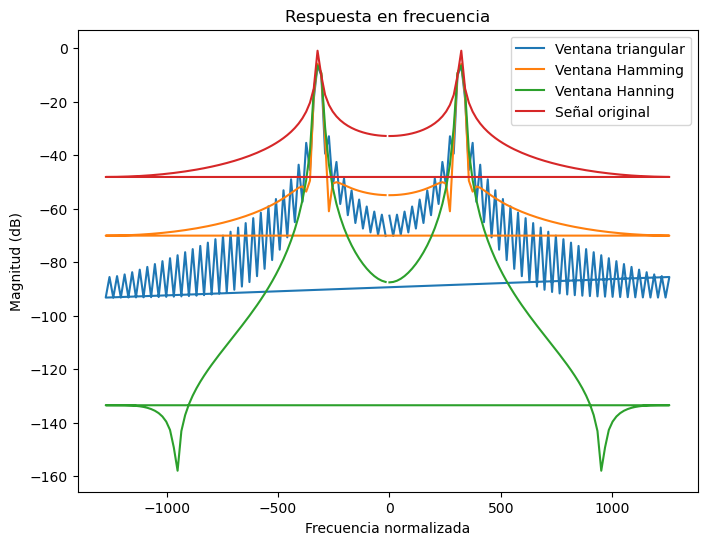

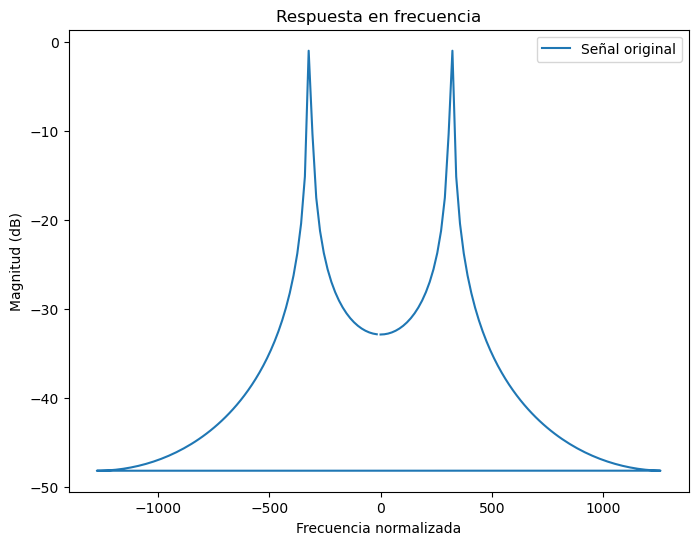

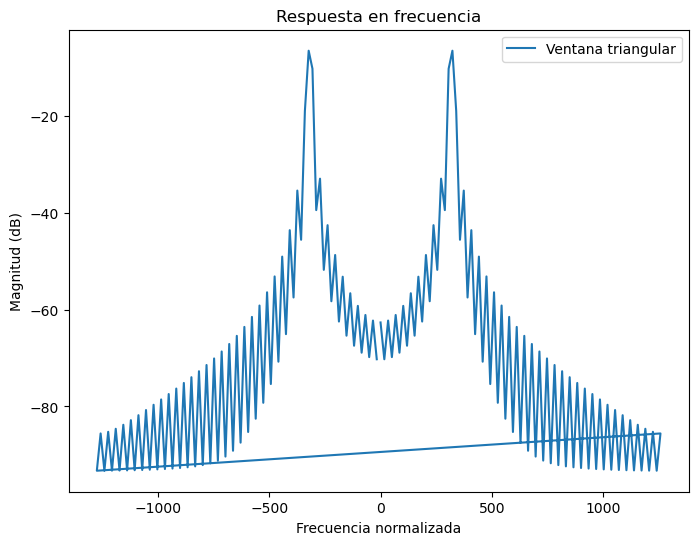

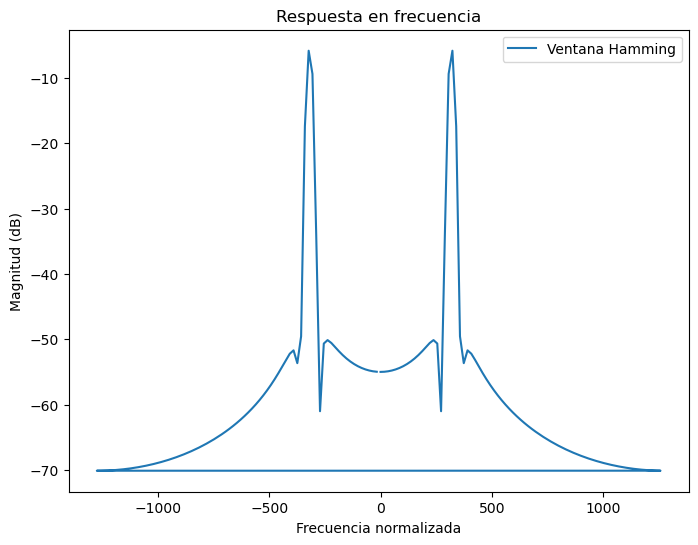

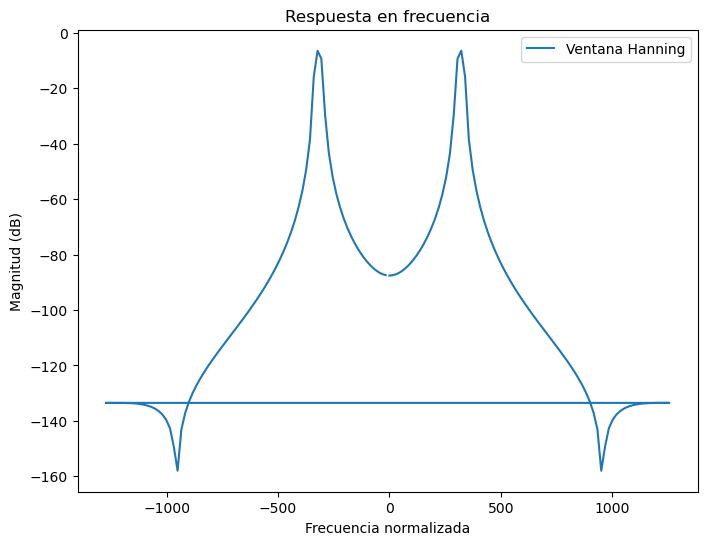

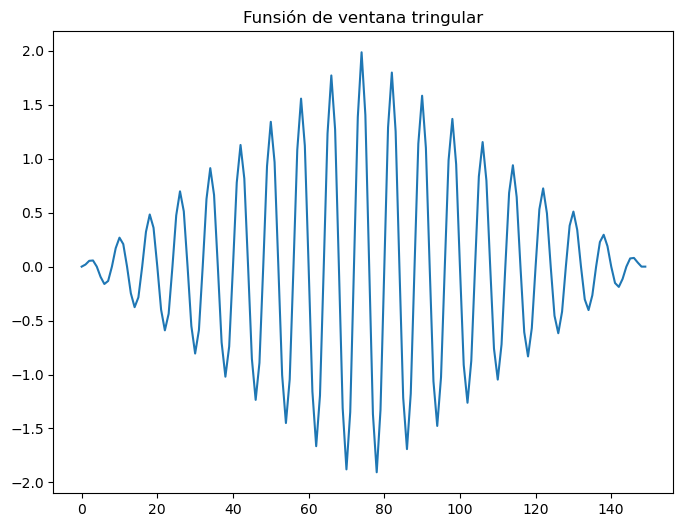

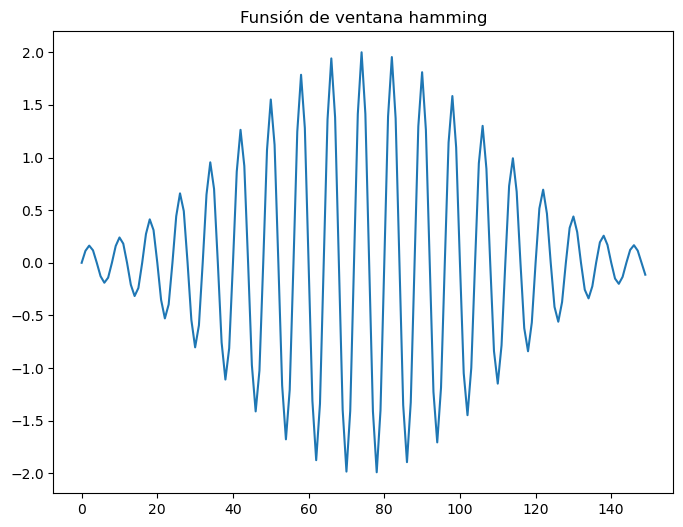

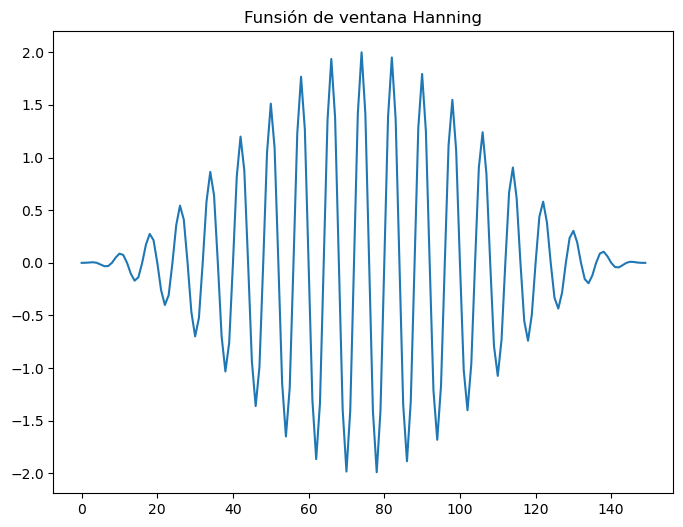

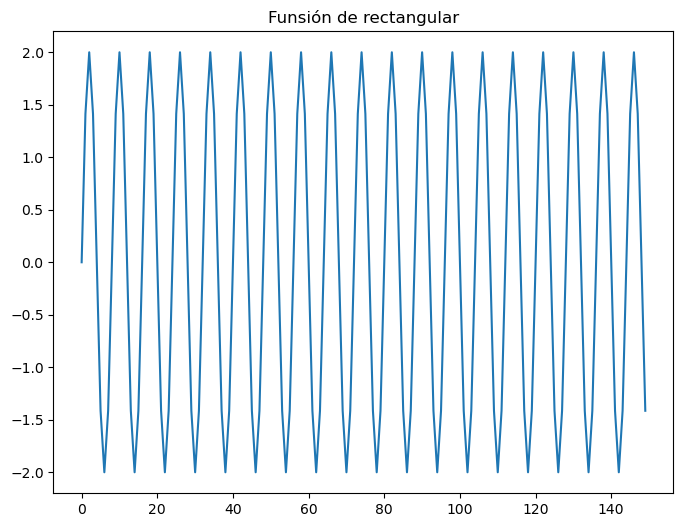

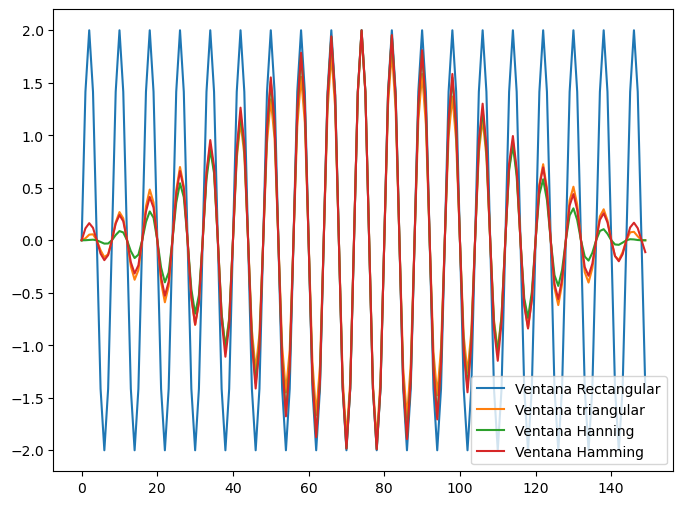

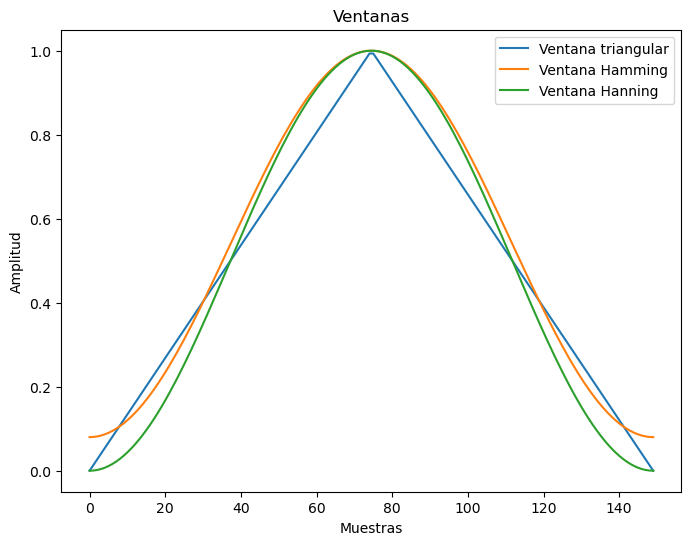

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal de entrada
n = np.arange(0, 8000)
x = 2 * np.sin(2000 * np.pi * n / 8000)

# Definir las ventanas
triangular_window = np.bartlett(150)
hamming_window = np.hamming(150)
hanning_window = np.hanning(150)

# Aplicar las ventanas a la señal de entrada
x_tri = x[:150] * triangular_window
x_ham = x[:150] * hamming_window
x_han = x[:150] * hanning_window
x_sen = x[:150]

# Calcular la transformada de Fourier
Senal = np.abs(np.fft.fft(x_sen)) / 150
X_tri = np.abs(np.fft.fft(x_tri)) / 150
X_ham = np.abs(np.fft.fft(x_ham)) / 150
X_han = np.abs(np.fft.fft(x_han)) / 150
freq_tri = np.fft.fftfreq(len(x_tri), d=1/8000)
freq_ham = np.fft.fftfreq(len(x_ham), d=1/8000)
freq_han = np.fft.fftfreq(len(x_han), d=1/8000)
freq_sen = np.fft.fftfreq(len(X_han), d=1/8000)

# Calcular la respuesta en frecuencia en dB y frecuencia normalizada
H_tri = 20 * np.log10(X_tri)
H_ham = 20 * np.log10(X_ham)
H_han = 20 * np.log10(X_han)
H_sen = 20 * np.log10(Senal)
freq_norm_tri = freq_tri / np.pi
freq_norm_ham = freq_ham / np.pi
freq_norm_han = freq_han / np.pi
freq_norm_sen = freq_sen / np.pi

# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(freq_norm_tri[:150], H_tri[:150], label='Ventana triangular')
plt.plot(freq_norm_ham[:150], H_ham[:150], label='Ventana Hamming')
plt.plot(freq_norm_han[:150], H_han[:150], label='Ventana Hanning')
plt.plot(freq_norm_sen[:150], H_sen[:150], label='Señal original')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Magnitud (dB)')
plt.title('Respuesta en frecuencia')
plt.legend()
plt.show()

# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(freq_norm_sen[:150], H_sen[:150], label='Señal original')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Magnitud (dB)')
plt.title('Respuesta en frecuencia')
plt.legend()
plt.show()


# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(freq_norm_tri[:150], H_tri[:150], label='Ventana triangular')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Magnitud (dB)')
plt.title('Respuesta en frecuencia')
plt.legend()
plt.show()

# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(freq_norm_ham[:150], H_ham[:150], label='Ventana Hamming')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Magnitud (dB)')
plt.title('Respuesta en frecuencia')
plt.legend()
plt.show()

# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(freq_norm_han[:150], H_han[:150], label='Ventana Hanning')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Magnitud (dB)')
plt.title('Respuesta en frecuencia')
plt.legend()
plt.show()

# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(x_tri)
plt.title('Funsión de ventana tringular')
plt.show()

# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(x_ham)
plt.title('Funsión de ventana hamming')
plt.show()

# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(x_han)
plt.title('Funsión de ventana Hanning')
plt.show()

# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(x_sen)
plt.title('Funsión de rectangular')
plt.show()

# Graficar los espectros de frecuencia
plt.figure(figsize=(8, 6))
plt.plot(x_sen, label='Ventana Rectangular')
plt.plot(x_tri, label='Ventana triangular')
plt.plot(x_han, label='Ventana Hanning')
plt.plot(x_ham, label='Ventana Hamming')
plt.legend()
plt.show()


# Graficar las ventanas
plt.figure(figsize=(8, 6))
plt.plot(triangular_window, label='Ventana triangular')
plt.plot(hamming_window, label='Ventana Hamming')
plt.plot(hanning_window, label='Ventana Hanning')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Ventanas')
plt.legend()
plt.show()
